In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
os.chdir("D:\CDAC\Machine Learning")
df = pd.read_csv('student_clustering.csv')

In [3]:
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


In [4]:
df.shape

(200, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    200 non-null    float64
 1   iq      200 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [6]:
df.describe()

,cgpa,iq
count,200.000000,200.000000
mean,6.983400,101.995000
std,1.624101,12.161599
min,4.600000,83.000000
25%,5.407500,91.000000
50%,7.040000,102.000000
75%,8.585000,113.000000
max,9.300000,121.000000


In [7]:
df = df.values

# K-MEANS

C:\Users\Vibhishan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


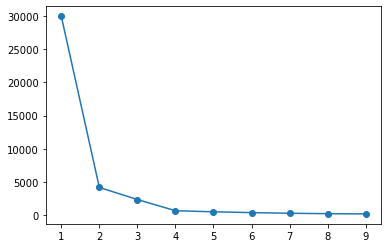

In [8]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of square
for i in range (1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss, marker = 'o')

In [9]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=0)

In [10]:
y_pred = kmeans.fit_predict(df)

In [11]:
y_pred

array([1, 2, 3, 3, 2, 2, 3, 0, 2, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1,
       3, 1, 1, 3, 1, 0, 3, 2, 0, 2, 0, 2, 3, 3, 0, 2, 1, 2, 1, 3, 3, 1,
       0, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 2, 0, 2, 0, 2, 3, 3, 0, 1, 0,
       3, 1, 2, 3, 2, 0, 3, 1, 2, 0, 2, 0, 1, 3, 3, 0, 2, 1, 0, 1, 0, 2,
       0, 2, 0, 0, 3, 1, 3, 3, 0, 3, 1, 0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 0,
       3, 0, 2, 2, 3, 0, 3, 2, 0, 1, 1, 2, 3, 0, 3, 1, 3, 2, 1, 3, 3, 2,
       1, 1, 2, 0, 2, 1, 3, 3, 3, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 3, 2, 0, 2, 3, 1, 0, 2, 3, 0, 1, 2, 1, 1, 0, 0, 2, 0, 1, 1, 3,
       0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 3, 3, 0, 2, 3, 3, 1, 1, 3, 1, 0, 2,
       2, 0])

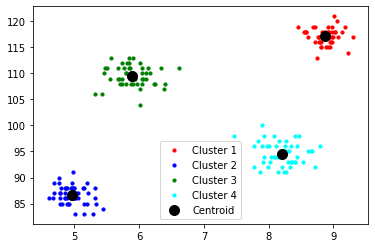

In [12]:
plt.scatter(df[y_pred==0,0],df[y_pred==0,1],s=10,c='red',label='Cluster 1')
plt.scatter(df[y_pred==1,0],df[y_pred==1,1],s=10,c='blue',label='Cluster 2')
plt.scatter(df[y_pred==2,0],df[y_pred==2,1],s=10,c='green',label='Cluster 3')
plt.scatter(df[y_pred==3,0],df[y_pred==3,1],s=10,c='cyan',label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='k',label='Centroid')
plt.legend()

# Heirarchical 

Text(0.5, 1.0, 'Dendrogram')

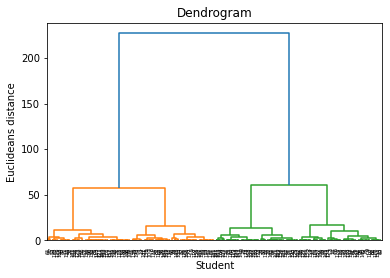

In [13]:
import scipy.cluster.hierarchy as sch
# usind dendogram to find the optimal number of cluster
sch.dendrogram(sch.linkage(df,method='ward'))
plt.xlabel('Student')
plt.ylabel('Euclideans distance')
plt.title('Dendrogram')

In [14]:
# training model for hierarchical clustering

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean',linkage='ward')
y_pred = hc.fit_predict(df)

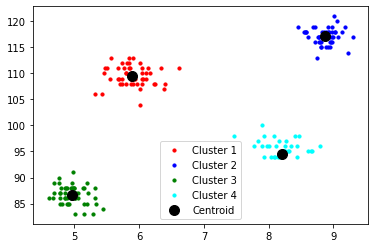

In [15]:
plt.scatter(df[y_pred==0,0],df[y_pred==0,1],s=10,c='red',label='Cluster 1')
plt.scatter(df[y_pred==1,0],df[y_pred==1,1],s=10,c='blue',label='Cluster 2')
plt.scatter(df[y_pred==2,0],df[y_pred==2,1],s=10,c='green',label='Cluster 3')
plt.scatter(df[y_pred==3,0],df[y_pred==3,1],s=10,c='cyan',label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='k',label='Centroid')
plt.legend()

# DBSCAN

In [21]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5,min_samples=4,metric='euclidean')
model = db.fit(df)

In [22]:
label = model.labels_

In [23]:
y_pred = db.fit_predict(df)

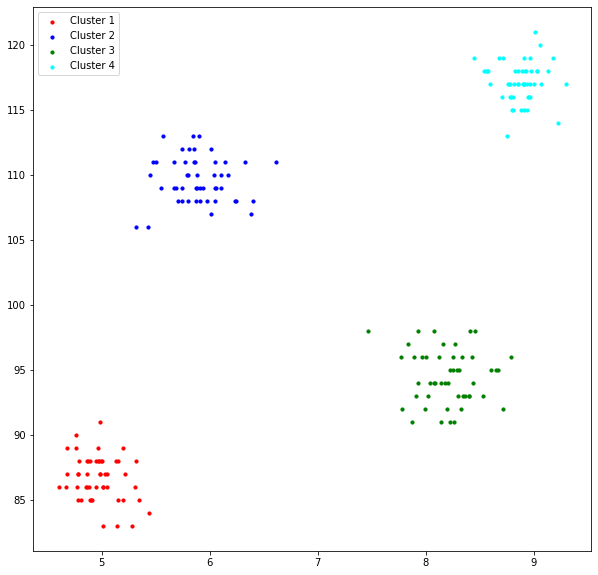

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(df[y_pred==0,0],df[y_pred==0,1],s=10,c='red',label='Cluster 1')
plt.scatter(df[y_pred==1,0],df[y_pred==1,1],s=10,c='blue',label='Cluster 2')
plt.scatter(df[y_pred==2,0],df[y_pred==2,1],s=10,c='green',label='Cluster 3')
plt.scatter(df[y_pred==3,0],df[y_pred==3,1],s=10,c='cyan',label='Cluster 4')
plt.legend()

In [25]:
from sklearn.metrics import silhouette_score
ss = silhouette_score(df,label)
ss

0.6932759182381902